In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('GOOGL.csv',index_col="Date",parse_dates=True)

In [3]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [4]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3722 entries, 2004-08-19 to 2019-06-03
Data columns (total 6 columns):
Open         3722 non-null float64
High         3722 non-null float64
Low          3722 non-null float64
Close        3722 non-null float64
Adj Close    3722 non-null float64
Volume       3722 non-null int64
dtypes: float64(5), int64(1)
memory usage: 203.5 KB


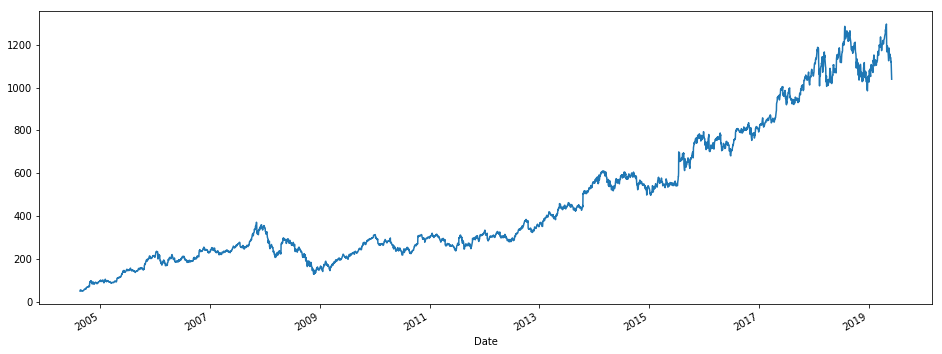

In [6]:
# convert column "a" of a DataFrame
# dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)

dataset['Close'].plot(figsize=(16,6))

In [7]:
# dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [8]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-26,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-27,52.982268,54.539539,51.716717,53.123123,53.123123,1.764169e+07
2004-08-30,53.359788,54.641784,52.149293,53.242529,53.242529,1.200421e+07
2004-08-31,53.452023,54.257829,52.267982,52.817818,52.817818,9.444714e+06


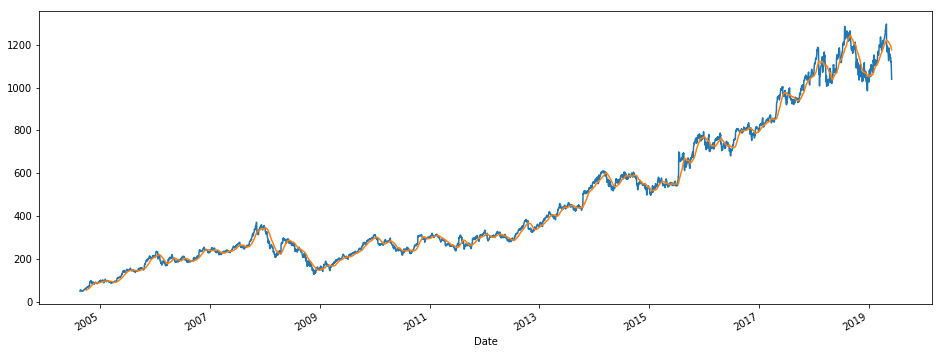

In [9]:
dataset['Close'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

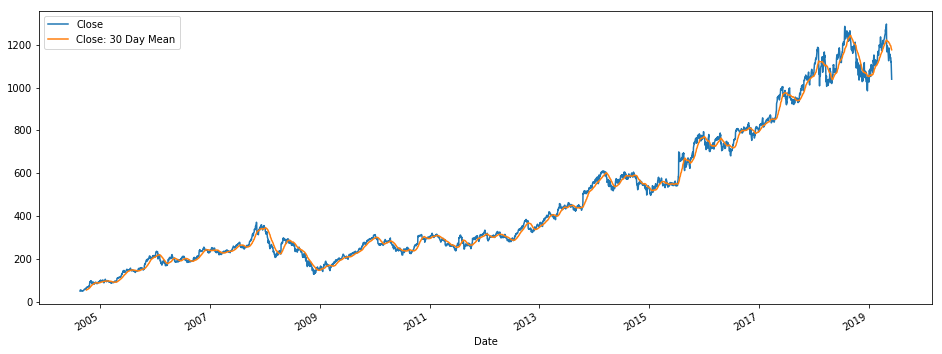

In [10]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

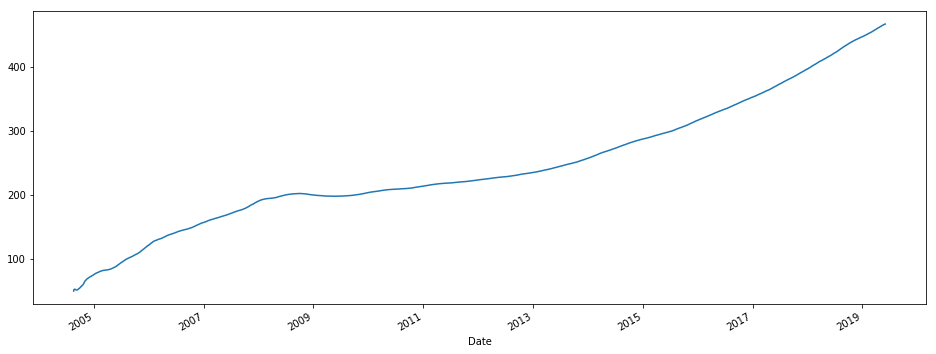

In [11]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [12]:
training_set=dataset['Close']
training_set=pd.DataFrame(training_set)

In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
training_set.shape
type(training_set_scaled)
training_set_scaled = training_set_scaled.tolist()

In [15]:
# Creating a data structure with 60 timesteps and 1 output
X = []
Y = []
for i in range(0, len(training_set_scaled)-10):
    x = training_set_scaled[i:9+i]
    y = training_set_scaled[i+9]
    X.append(x)
    if y > x[-1]:
        Y.append(1)
    else:
        Y.append(-1)
        
#     y_train.append(training_set_scaled[i, 0])
    
# X_train, y_train = np.array(X_train), np.array(y_train)


In [16]:
X_train = X[:(4*len(X))//5]
X_test = X[(4*len(X))//5:]
Y_train = Y[:(4*len(Y))//5]
Y_test = Y[(4*len(Y))//5:]

In [17]:
X_train , X_test ,Y_train , Y_test = np.array(X_train) ,np.array(X_test),np.array(Y_train),np.array(Y_test)

In [18]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape,Y_train.shape

((2969, 9, 1), (2969,))

In [19]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,Embedding

C:\Users\kamran\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
# Initialising the RNN
regressor = Sequential()

In [31]:
# Adding the first LSTM layer and some Dropout regularisation


regressor.add(LSTM(units = 20,input_shape = (X_train.shape[1], 1), return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(output_dim=25, activation='sigmoid', inner_activation='hard_sigmoid', return_sequences=True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(output_dim=25, activation='sigmoid', inner_activation='hard_sigmoid'))
regressor.add(Dropout(0.5))
regressor.add(Dense(1, activation='sigmoid'))




# Adding a second LSTM layer and some Dropout regularisation
# regressor.add(LSTM(units = 50,activation='sigmoid', inner_activation='hard_sigmoid',return_sequences = True))
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
# regressor.add(LSTM(units = 50,activation='sigmoid', inner_activation='hard_sigmoid' ,return_sequences = True))
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# regressor.add(LSTM(units = 50 ,activation='sigmoid', inner_activation='hard_sigmoid'))
# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

# Adding the output layer
# regressor.add(TimeDistributed(Dense(1, activation='sigmoid')))
# regressor.add(Dense(1, activation='sigmoid'))

# regressor.add(Dense(units = 1))
# regressor.fit(X_train, Y_train, epochs = 3, batch_size = 64)
print(regressor.summary())

C:\Users\kamran\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="sigmoid", return_sequences=True, units=25, recurrent_activation="hard_sigmoid")`
  
C:\Users\kamran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="sigmoid", units=25, recurrent_activation="hard_sigmoid")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 9, 20)             1760      
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 20)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 9, 25)             4600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 25)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total para

In [32]:
# Compiling the RNN
regressor.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, Y_train, epochs = 120, batch_size = 64)

# regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/120
2969/2969 [==============================] - 4s 2ms/step - loss: 0.2959 - acc: 0.0024
Epoch 2/120
2969/2969 [==============================] - 1s 461us/step - loss: 0.2006 - acc: 0.0000e+00
Epoch 3/120
2969/2969 [==============================] - 1s 432us/step - loss: 0.1685 - acc: 0.0000e+00
Epoch 4/120
2969/2969 [==============================] - 1s 442us/step - loss: 0.2002 - acc: 0.0000e+00
Epoch 5/120
2969/2969 [==============================] - 1s 473us/step - loss: 0.1843 - acc: 0.0000e+00
Epoch 6/120
2969/2969 [==============================] - 1s 470us/step - loss: 0.1440 - acc: 0.0000e+00
Epoch 7/120
2969/2969 [==============================] - 1s 498us/step - loss: 0.1586 - acc: 0.0000e+00
Epoch 8/120
2969/2969 [==============================] - 1s 498us/step - loss: 0.1609 - acc: 0.0000e+00
Epoch 9/120
2969/2969 [==============================] - 1s 444us/step - loss: 0.1759 - acc: 0.0000e+00
Epoch 10/120
2969/2969 [==============================] - 1s 463us/ste

In [34]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
# dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [35]:
#Close
# real_stock_price = dataset_test.iloc[:, 3].values
# real_stock_price

In [36]:
# dataset_test.head()

In [37]:
# dataset_test.info()

In [38]:
# dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [39]:
# test_set=dataset_test['Close']
# test_set=pd.DataFrame(test_set)

In [40]:
# test_set.info()

In [35]:
# dataset_total = pd.concat((dataset['Close'], dataset_test['Close']), axis = 0)
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)
# X_test = []
# Y_test = []

# print(dataset_test.shape[0])
# print(len(inputs))
# for i in range(10, dataset_test.shape[0]+10):
#     X_test.append(inputs[i-10:i, 0][0])
#     print(X_test)
#     y = inputs[i,0][0]
#     print(y)
#     print(input[i-1,0])
#     if y > input[i-1,0] :
#         Y_test.append(1)
#     else:
#         Y_test.append(-1)
# X_test = np.array(X_test)
# # print(X_test)


X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
score = regressor.evaluate(X_test, Y_test, batch_size=16,verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))


predicted_stock_price = regressor.predict(X_test)

# scores = model.evaluate(X_test, Y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

Accuracy: 0.00%


array([[0.01489396],
       [0.01489254],
       [0.01488993],
       [0.01489106],
       [0.01489354],
       [0.01489379],
       [0.01489396],
       [0.01489575],
       [0.01489997],
       [0.01490503],
       [0.01490414],
       [0.01490319],
       [0.0149033 ],
       [0.01490561],
       [0.01491393],
       [0.01491363],
       [0.01490994],
       [0.01490762],
       [0.01490474],
       [0.01490337],
       [0.01490433],
       [0.01490295],
       [0.01490183],
       [0.01489779],
       [0.01489488],
       [0.01489361],
       [0.01489364],
       [0.01489148],
       [0.01488966],
       [0.0148852 ],
       [0.01488477],
       [0.01488397],
       [0.01488414],
       [0.01488311],
       [0.01488334],
       [0.01488264],
       [0.01488045],
       [0.01487695],
       [0.01487057],
       [0.01486862],
       [0.01486891],
       [0.01486908],
       [0.01486863],
       [0.01486667],
       [0.01486681],
       [0.01486627],
       [0.01486613],
       [0.014

In [29]:

# predicted_stock_price=pd.DataFrame(predicted_stock_price)
# predicted_stock_price.info()
type(predicted_stock_price),Y_test.shape
predicted_stock_price = np.squeeze(predicted_stock_price)

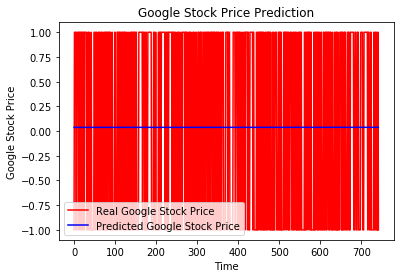

In [44]:
# Visualising the results
plt.plot(Y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [74]:
real_stock_price

array([[789.63],
       [791.34],
       [794.48],
       [807.9 ],
       [809.97],
       [809.13],
       [808.15],
       [807.39],
       [811.22],
       [807.14],
       [806.21],
       [809.48],
       [806.91],
       [820.87],
       [825.9 ],
       [835.77],
       [838.  ],
       [841.95],
       [815.84],
       [801.25]])

In [75]:
predicted_stock_price

,0
0,787.305664
1,787.147949
2,790.197510
3,795.536987
4,804.080322
5,811.059998
6,813.820801
7,815.019470
8,814.942871
9,815.080505


In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real_stock_price,predicted_stock_price.values)

99.25969650145105

In [57]:
from scipy import stats
real_zscore = stats.zscore(real_stock_price)
pred_zscore = stats.zscore(predicted_stock_price)

In [58]:
mean_squared_error(real_zscore,pred_zscore)

0.862177165462428

In [60]:
real_zscore,pred_zscore

(array([[-1.59066904],
        [-1.46867482],
        [-1.24466205],
        [-0.28725714],
        [-0.13957993],
        [-0.19950692],
        [-0.26942173],
        [-0.32364138],
        [-0.05040287],
        [-0.34147679],
        [-0.40782453],
        [-0.17453734],
        [-0.35788537],
        [ 0.63804402],
        [ 0.99689251],
        [ 1.70103456],
        [ 1.86012644],
        [ 2.14192594],
        [ 0.27919554],
        [-0.7616791 ]]), array([[-1.2219721 ],
        [-1.4228083 ],
        [-1.4453918 ],
        [-1.3499699 ],
        [-1.0944504 ],
        [-0.63512915],
        [-0.16021173],
        [ 0.10525564],
        [ 0.1810992 ],
        [ 0.15398812],
        [ 0.09410276],
        [ 0.0299774 ],
        [-0.0187055 ],
        [-0.00523179],
        [ 0.06235498],
        [ 0.38761845],
        [ 0.93178886],
        [ 1.5675924 ],
        [ 2.002049  ],
        [ 1.8380188 ]], dtype=float32))